In [1]:
# Import required libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from nltk.corpus import wordnet
import string
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from wordcloud import STOPWORDS

In [2]:
# load the data
tweets = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train = tweets.copy()

In [4]:
df_train

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...
...,...,...,...
6520,296675082267410433,Politics,'Photo: PM has laid a wreath at Martyrs Monume...
6521,306677536195231746,Sports,'The secret of the Chennai pitch - crumbling o...
6522,306451295307431937,Sports,@alinabhutto he isn't on Twitter either
6523,306088574221176832,Sports,'Which England player would you take out to di...


In [5]:
# word_count
df_train['word_count'] = df_train['TweetText'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['TweetText'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['TweetText'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['TweetText'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df_train['stop_word_count'] = df_train['TweetText'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_test['stop_word_count'] = df_test['TweetText'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
df_train['url_count'] = df_train['TweetText'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df_test['url_count'] = df_test['TweetText'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
# mean_word_length
df_train['mean_word_length'] = df_train['TweetText'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['TweetText'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_train['char_count'] = df_train['TweetText'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['TweetText'].apply(lambda x: len(str(x)))

# punctuation_count
df_train['punctuation_count'] = df_train['TweetText'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['TweetText'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_train['hashtag_count'] = df_train['TweetText'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_test['hashtag_count'] = df_test['TweetText'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count'] = df_train['TweetText'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_test['mention_count'] = df_test['TweetText'].apply(lambda x: len([c for c in str(x) if c == '@']))

C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_15476\1253068272.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_15476\1253068272.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297

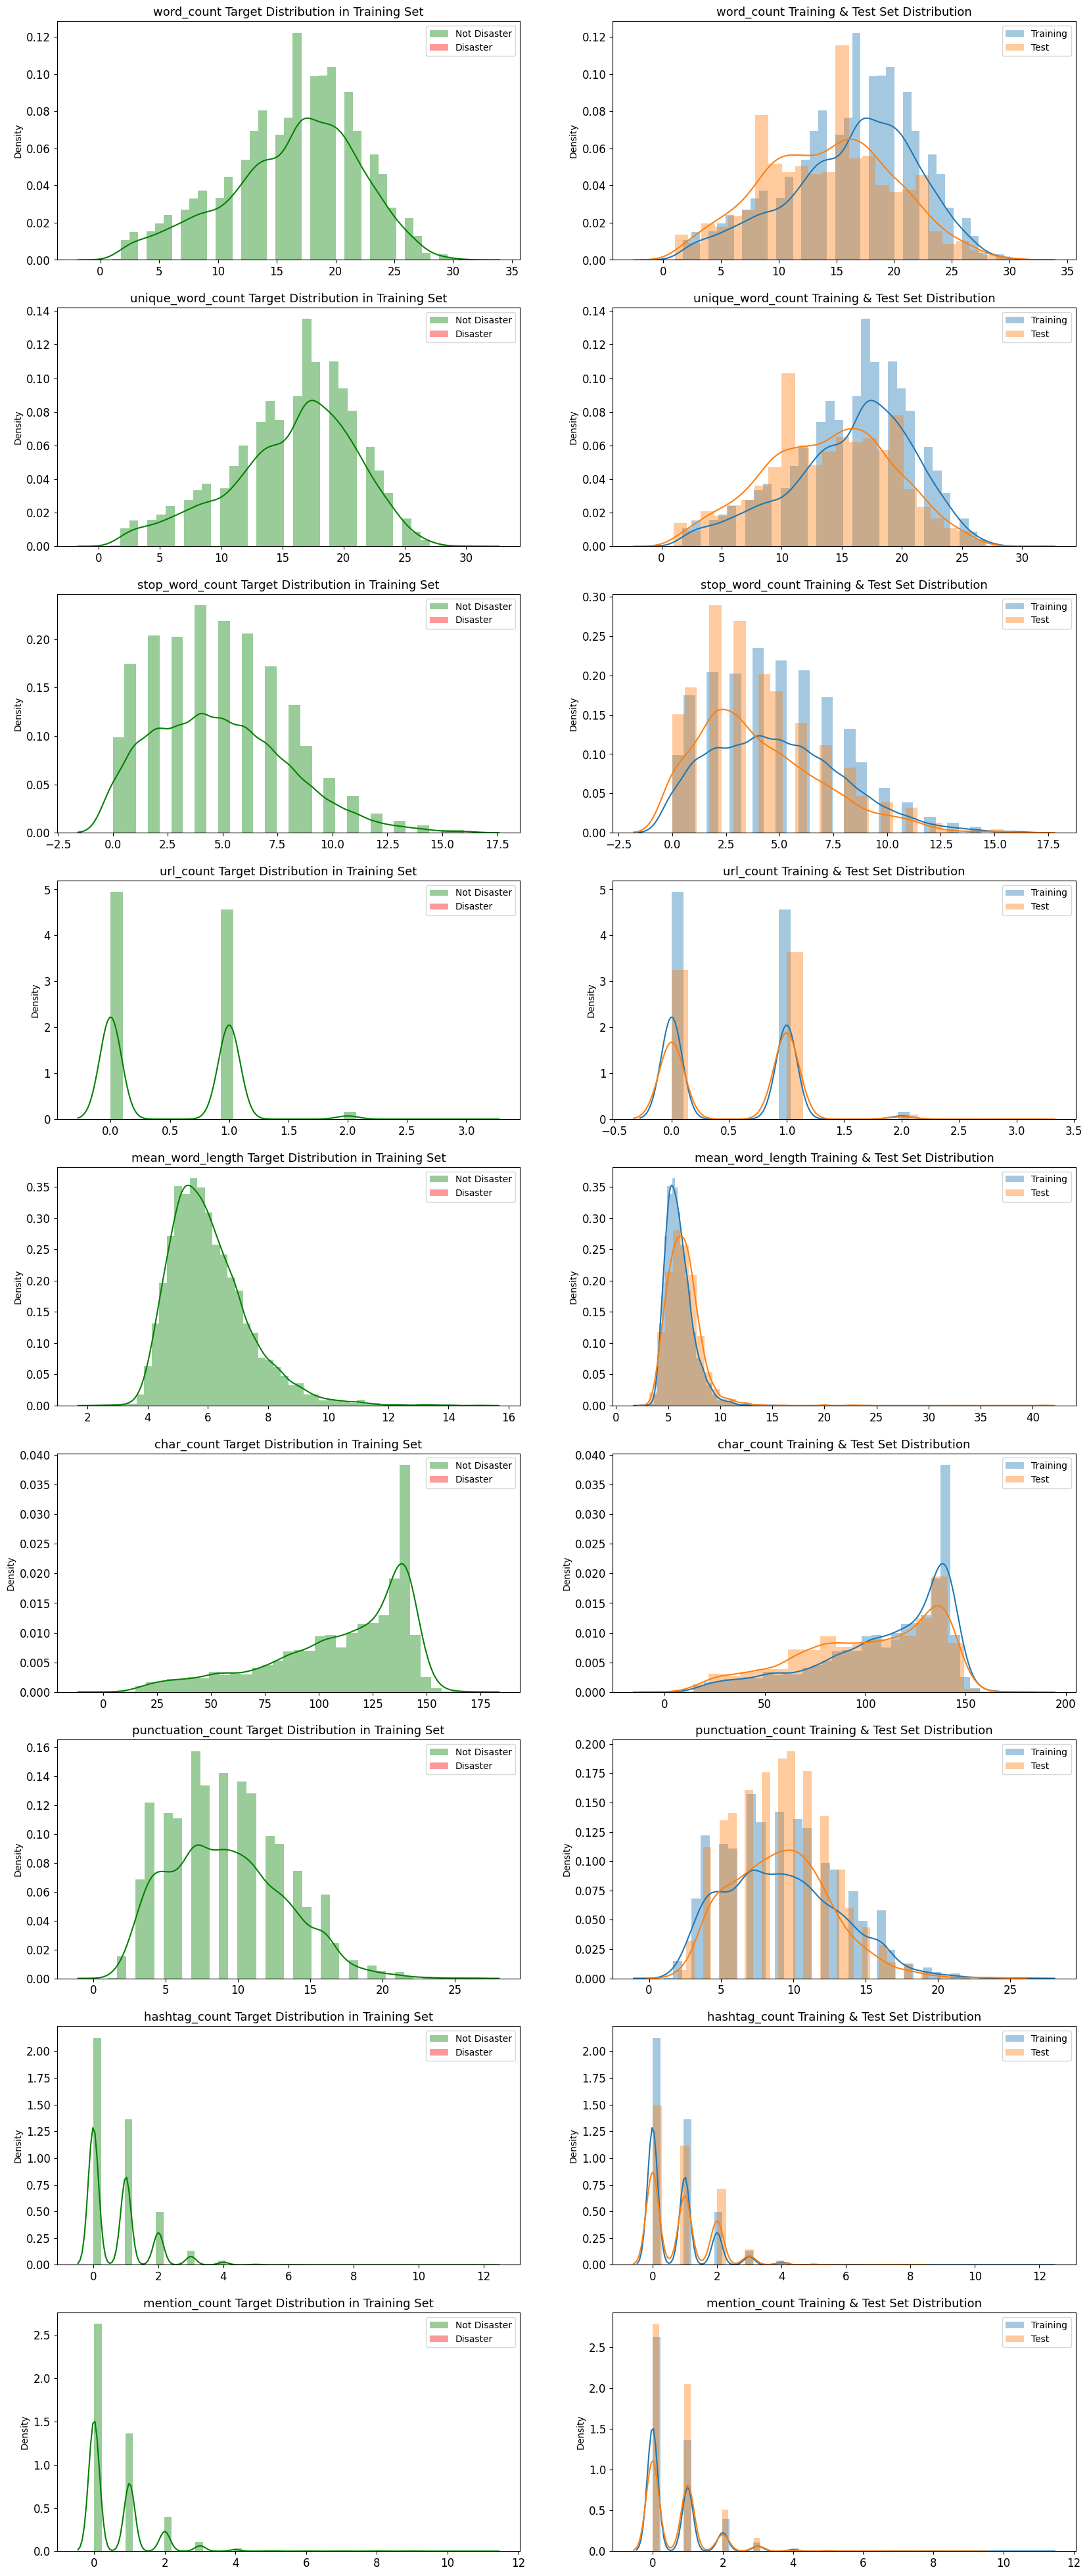

In [7]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
DISASTER_TWEETS = df_train['Label'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(df_train.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(df_train.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')

    sns.distplot(df_train[feature], label='Training', ax=axes[i][1])
    sns.distplot(df_test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

In [14]:
def clean_text(text):
    text=str(text).lower() #Converts text to lowercase
    text=re.sub('\d+', '', text) #removes numbers
    text=re.sub('\[.*?\]', '', text) #removes HTML tags
    text=re.sub('https?://\S+|www\.\S+', '', text) #removes url
    text=re.sub(r"["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", "", text) #removes emojis
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text) #removes punctuations
    
    return text

In [15]:
tweets['TextClean'] = tweets['TweetText'].apply(clean_text)

In [16]:
index_drop_to_sport= [4182, 5545,3004,5314,5545,5421,290]
index_drop_to_poly=[1634]
tweets.loc[index_drop_to_sport,'Label']='Sports'
tweets.loc[index_drop_to_poly,'Label']='Politics'

In [17]:
# Create the feature matrix and target vector
vectorizer = TfidfVectorizer()
vectorizer.fit(tweets['TweetText'])
X = vectorizer.transform(tweets['TweetText']).toarray()
y = tweets['Label']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

# Train the model
model = MultinomialNB(alpha=2)
model.fit(X_train, y_train)

MultinomialNB(alpha=2)

              precision    recall  f1-score   support

    Politics       0.99      0.97      0.98      2548
      Sports       0.98      0.99      0.98      2672

    accuracy                           0.98      5220
   macro avg       0.98      0.98      0.98      5220
weighted avg       0.98      0.98      0.98      5220

score train: 0.98 test: 0.95


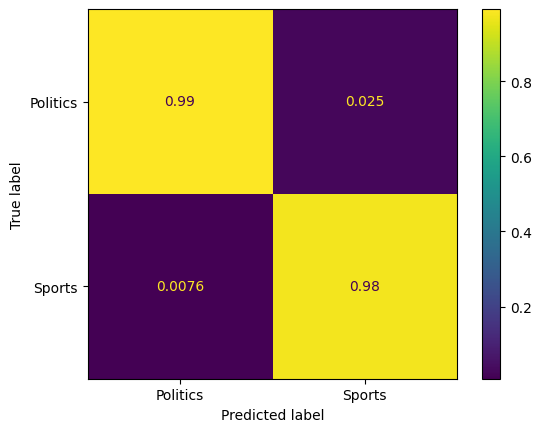

In [19]:
y_predict = model.predict(X_train)

print("{}\nscore train: {:.2} test: {:.2}".format(
    classification_report(y_train, y_predict),
    model.score(X_train, y_train), model.score(X_test, y_test)
))

ConfusionMatrixDisplay(
    confusion_matrix(y_train, y_predict, normalize='pred'),
    display_labels=["Politics", "Sports"], 
).plot()

              precision    recall  f1-score   support

    Politics       0.97      0.93      0.95       647
      Sports       0.93      0.97      0.95       658

    accuracy                           0.95      1305
   macro avg       0.95      0.95      0.95      1305
weighted avg       0.95      0.95      0.95      1305

score train: 0.98 test: 0.95


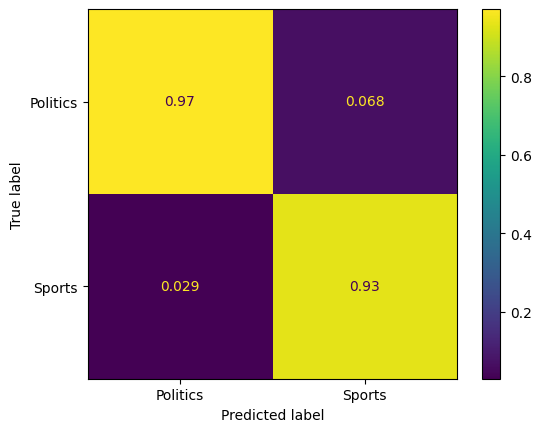

In [20]:
y_predict = model.predict(X_test)

print("{}\nscore train: {:.2} test: {:.2}".format(
    classification_report(y_test, y_predict),
    model.score(X_train, y_train), model.score(X_test, y_test)
))

ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_predict, normalize='pred'),
    display_labels=["Politics", "Sports"], 
).plot()

In [21]:
df_test.loc[:10]

,TweetId,TweetText,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,306486520121012224,'28. The home side threaten again through Maso...,25,24,11,0,4.080000,126,5,0,0
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....,21,18,8,1,5.714286,140,13,0,2
2,289531046037438464,'@Sochi2014 construction along the shores of t...,10,9,3,1,7.100000,80,8,0,1
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...,13,13,2,2,10.000000,142,18,1,0
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...,26,24,10,0,4.500000,142,6,1,0
5,305722428531802112,'Viswanathan Anand draws with Fabiano Caruana ...,9,9,2,1,7.888889,79,7,0,0
6,304713516256997377,Have your say on tonight's game - send a text ...,21,21,7,0,4.809524,121,10,0,2
7,234999630725783553,"'The #olympics may be over, but the #paralympi...",24,22,12,0,4.791667,138,8,2,1
8,303712268372283392,"'@richaanirudh big compliment, thanks!'",4,4,0,0,9.000000,39,5,0,1
9,304215754130194432,'Espargar\xf3 @PolEspargaro quickest as Jerez ...,14,14,3,1,6.714286,107,11,1,1


In [22]:
pd.set_option('display.max_rows', None)

In [23]:
df_test.loc[72,'TweetText']

"'#Syria: conflict parties increasingly breach international law, #UN rights panel finds http://t.co/VURVzYWg'"

In [24]:
df_test['TextClean'] = df_test['TweetText'].apply(clean_text)

In [25]:
vectorizer = TfidfVectorizer()
X_train_f = vectorizer.fit_transform(tweets['TextClean']).toarray()
X_test_f = vectorizer.transform(df_test['TextClean']).toarray()

In [26]:
model = MultinomialNB(alpha=2)
model.fit(X_train_f, y)

MultinomialNB(alpha=2)

In [27]:
test_pred = model.predict(X_test_f)

# create submission file
submission_df = pd.DataFrame({'TweetId': df_test['TweetId'], 'Label': test_pred})
submission_df.to_csv('submission_final.csv', index=False)